# Sistema cuántico

## El sistema consiste en una partícula confinada a un conjunto discreto de posiciones en una línea. El simulador debe permitir especificar el número de posiciones y un vector ket de estado asignando las amplitudes.

1. El sistema debe calcular la probabilidad de encontrarlo en una posición en particular.

2. El sistema si se le da otro vector Ket debe buscar la probabilidad de transitar del primer vector al segundo.

Probabilidad de encontrar la partícula en la posición 2: 0.5000
Probabilidad de transición entre ket1 y ket2: 0.0000


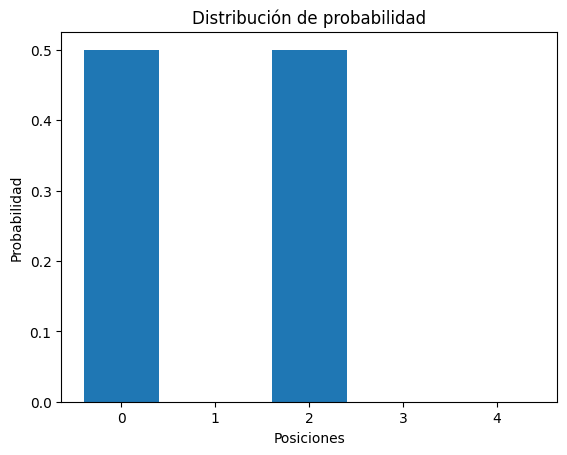

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def normalize_ket(ket):
    norm = np.linalg.norm(ket)
    if norm == 0:
        raise ValueError("El vector ket no puede ser cero.")
    return ket / norm

def probability_in_position(ket, position):
    ket_normalized = normalize_ket(ket)
    amplitude = ket_normalized[position]
    return np.abs(amplitude)**2

def transition_probability(ket1, ket2):
    ket1_normalized = normalize_ket(ket1)
    ket2_normalized = normalize_ket(ket2)
    overlap = np.dot(np.conjugate(ket1_normalized), ket2_normalized)
    return np.abs(overlap)**2

def plot_probability_distribution(ket):
    ket_normalized = normalize_ket(ket)
    probabilities = np.abs(ket_normalized)**2
    positions = np.arange(len(ket))
    
    plt.bar(positions, probabilities)
    plt.xlabel('Posiciones')
    plt.ylabel('Probabilidad')
    plt.title('Distribución de probabilidad')
    plt.show()

n_positions = 5

ket1 = np.array([1+0j, 0+0j, 1+0j, 0+0j, 0+0j])

ket2 = np.array([0+0j, 1+0j, 0+0j, 1+0j, 0+0j])

position = 2
prob_pos = probability_in_position(ket1, position)
print(f"Probabilidad de encontrar la partícula en la posición {position}: {prob_pos:.4f}")

prob_trans = transition_probability(ket1, ket2)
print(f"Probabilidad de transición entre ket1 y ket2: {prob_trans:.4f}")

plot_probability_distribution(ket1)


1. Amplitud de transición. El sistema puede recibir dos vectores y calcular la probabilidad de transitar de el uno al otro después de hacer la observación

In [2]:
import numpy as np

def normalize_ket(ket):
    norm = np.linalg.norm(ket)
    if norm == 0:
        raise ValueError("El vector ket no puede ser cero.")
    return ket / norm

def transition_amplitude(ket1, ket2):
    ket1_normalized = normalize_ket(ket1)
    ket2_normalized = normalize_ket(ket2)
    overlap = np.dot(np.conjugate(ket1_normalized), ket2_normalized)
    return overlap

def transition_probability(ket1, ket2):
    amplitude = transition_amplitude(ket1, ket2)
    return np.abs(amplitude)**2

# Ejemplo
ket1 = np.array([1+0j, 0+0j, 1+0j])
ket2 = np.array([0+0j, 1+0j, 0+0j])

amplitude = transition_amplitude(ket1, ket2)
probability = transition_probability(ket1, ket2)
print(f"Amplitud de transición: {amplitude}")
print(f"Probabilidad de transición: {probability:.4f}")


Amplitud de transición: 0j
Probabilidad de transición: 0.0000


2. Ahora con una matriz que describa un observable y un vector ket, el sistema revisa que la matriz sea hermitiana, y si lo es, calcula la media y la varianza del observable en el estado dado.

In [3]:
import numpy as np

def is_hermitian(matrix):
    return np.allclose(matrix, np.conjugate(matrix.T))

def observable_mean_and_variance(observable, ket):
    if not is_hermitian(observable):
        raise ValueError("La matriz no es hermitiana.")
    ket_normalized = normalize_ket(ket)
    mean = np.vdot(ket_normalized, np.dot(observable, ket_normalized))
    variance = np.vdot(ket_normalized, np.dot(observable @ observable, ket_normalized)) - mean**2
    return mean, variance

observable = np.array([[1, 0, 0], [0, 2, 0], [0, 0, 3]], dtype=complex)
ket = np.array([1, 0, 1], dtype=complex)

mean, variance = observable_mean_and_variance(observable, ket)
print(f"Media: {mean}")
print(f"Varianza: {variance}")


Media: (1.9999999999999996+0j)
Varianza: (1.0000000000000009+0j)


3. El sistema calcula los valores propios del observable y la probabilidad de que el sistema transite a alguno de los vectores propios después de la observación.

In [4]:
import numpy as np

def eigenvalues_and_probabilities(observable, ket):
    if not is_hermitian(observable):
        raise ValueError("La matriz no es hermitiana.")
    eigenvalues, eigenvectors = np.linalg.eigh(observable)
    ket_normalized = normalize_ket(ket)
    probabilities = [np.abs(np.vdot(eigenvector, ket_normalized))**2 for eigenvector in eigenvectors.T]
    return eigenvalues, probabilities

observable = np.array([[2, 1], [1, 2]], dtype=complex)
ket = np.array([1, 0], dtype=complex)

eigenvalues, probabilities = eigenvalues_and_probabilities(observable, ket)
print(f"Valores propios: {eigenvalues}")
print(f"Probabilidades de transitar a los vectores propios: {probabilities}")


Valores propios: [1. 3.]
Probabilidades de transitar a los vectores propios: [np.float64(0.4999999999999999), np.float64(0.4999999999999999)]


4. Se considera la dinámica del sistema. Ahora con una serie de matrices Un el sistema calcula el estado final a partir de un estado inicial.

In [5]:
import numpy as np

def apply_unitary_matrices(U_series, initial_ket):
    ket = normalize_ket(initial_ket)
    for U in U_series:
        ket = np.dot(U, ket)
    return ket

U1 = np.array([[0, 1], [1, 0]], dtype=complex)
U2 = np.array([[1, 0], [0, np.exp(1j * np.pi)]], dtype=complex)
U_series = [U1, U2]

initial_ket = np.array([1, 0], dtype=complex)
final_ket = apply_unitary_matrices(U_series, initial_ket)
print(f"Estado final: {final_ket}")


Estado final: [ 0.+0.0000000e+00j -1.+1.2246468e-16j]


# 4.3.1

In [6]:
import numpy as np

Sx = 0.5 * np.array([[0, 1], [1, 0]], dtype=complex)

spin_up = np.array([1, 0], dtype=complex)

new_state = np.dot(Sx, spin_up)

new_state_normalized = new_state / np.linalg.norm(new_state)

prob_spin_up = np.abs(np.vdot(spin_up, new_state_normalized))**2

spin_down = np.array([0, 1], dtype=complex)
prob_spin_down = np.abs(np.vdot(spin_down, new_state_normalized))**2

print(f"Nuevo estado tras aplicar Sx: {new_state_normalized}")
print(f"Probabilidad de seguir en spin up: {prob_spin_up:.4f}")
print(f"Probabilidad de cambiar a spin down: {prob_spin_down:.4f}")


Nuevo estado tras aplicar Sx: [0.+0.j 1.+0.j]
Probabilidad de seguir en spin up: 0.0000
Probabilidad de cambiar a spin down: 1.0000


# 4.3.2


Valor propio 1: -0.5, Probabilidad: 0.5000
Valor propio 2: 0.5, Probabilidad: 0.5000


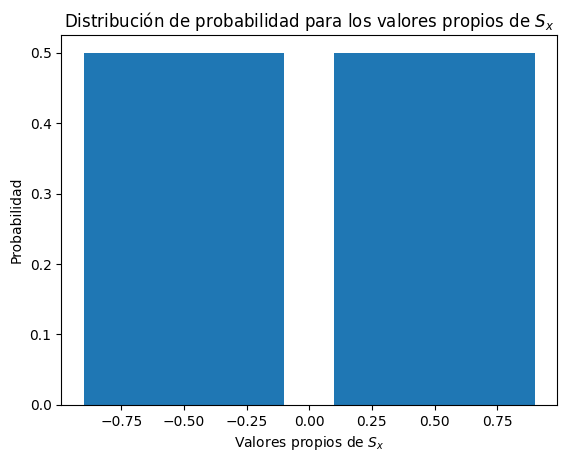

In [7]:
import numpy as np
import matplotlib.pyplot as plt

Sx = 0.5 * np.array([[0, 1], [1, 0]], dtype=complex)

spin_up = np.array([1, 0], dtype=complex)

eigenvalues, eigenvectors = np.linalg.eigh(Sx)

spin_up_normalized = spin_up / np.linalg.norm(spin_up)

probabilities = [np.abs(np.vdot(eigenvector, spin_up_normalized))**2 for eigenvector in eigenvectors.T]

for i, (eigenvalue, probability) in enumerate(zip(eigenvalues, probabilities)):
    print(f"Valor propio {i+1}: {eigenvalue}, Probabilidad: {probability:.4f}")

plt.bar(eigenvalues, probabilities)
plt.xlabel('Valores propios de $S_x$')
plt.ylabel('Probabilidad')
plt.title('Distribución de probabilidad para los valores propios de $S_x$')
plt.show()


# 4.4.1


In [8]:
import numpy as np

U1 = np.array([[0, 1], [1, 0]], dtype=complex)
U2 = (1/np.sqrt(2)) * np.array([[1, 1], [1, -1]], dtype=complex)

def is_unitary(U):
    identity = np.eye(U.shape[0])
    return np.allclose(np.dot(U.conjugate().T, U), identity)

print("U1 es unitaria:", is_unitary(U1))
print("U2 es unitaria:", is_unitary(U2))

U_product = np.dot(U1, U2)

print("El producto U1 * U2 es unitario:", is_unitary(U_product))

print("Producto U1 * U2:\n", U_product)


U1 es unitaria: True
U2 es unitaria: True
El producto U1 * U2 es unitario: True
Producto U1 * U2:
 [[ 0.70710678+0.j -0.70710678+0.j]
 [ 0.70710678+0.j  0.70710678+0.j]]


# 4.4.2

In [9]:
import numpy as np

U = np.array([[0, 1/np.sqrt(2), 1/np.sqrt(2), 0],
              [1j/np.sqrt(2), 0, 0, 1/np.sqrt(2)],
              [1/np.sqrt(2), 0, 0, 0],
              [0, 1/np.sqrt(2), -1/np.sqrt(2), 0]], dtype=complex)

psi_0 = np.array([1, 0, 0, 0], dtype=complex)

psi_1 = np.dot(U, psi_0) 
psi_2 = np.dot(U, psi_1)  
psi_3 = np.dot(U, psi_2) 

print("Estado del sistema después de tres pasos:")
print(psi_3)

prob_pos_3 = np.abs(psi_3[2])**2
print(f"Probabilidad de encontrar la bola cuántica en la posición 3: {prob_pos_3:.4f}")


Estado del sistema después de tres pasos:
[ 0.        +0.j         -0.70710678+0.70710678j  0.35355339+0.35355339j
  0.        +0.j        ]
Probabilidad de encontrar la bola cuántica en la posición 3: 0.2500
